# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [221]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [222]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv("pima-indians-diabetes.data", names= colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [261]:
#Note that on analysis, all females found to be 21 or over, which statisfies the constraints.
data.head(10)

preg   plas  pres  skin  test  mass   pedi  age  class
0     6  148.0  72.0  35.0    30  33.6  0.627   50      1
1     1   85.0  66.0  29.0    30  26.6  0.351   31      0
2     8  183.0  64.0  23.0    30  23.3  0.672   32      1
3     1   89.0  66.0  23.0    94  28.1  0.167   21      0
4     0  137.0  40.0  35.0   168  43.1  2.288   33      1
5     5  116.0  74.0  23.0    30  25.6  0.201   30      0
6     3   78.0  50.0  32.0    88  31.0  0.248   26      1
7    10  115.0  72.0  23.0    30  35.3  0.134   29      0
8     2  197.0  70.0  45.0   543  30.5  0.158   53      1
9     8  125.0  96.0  23.0    30  32.0  0.232   54      1

# Q3 Print the datatypes of each column and the shape of the dataset 

In [224]:
def print_column_names(data):
    for column in data:
        print("Column Name: " + column, "\tData Type: ", data[column].dtype)

print("Column Data: \n")
print_column_names(data)
print("\nDataset Shape: \t", data.shape)

Column Data: 

Column Name: preg 	Data Type:  int64
Column Name: plas 	Data Type:  int64
Column Name: pres 	Data Type:  int64
Column Name: skin 	Data Type:  int64
Column Name: test 	Data Type:  int64
Column Name: mass 	Data Type:  float64
Column Name: pedi 	Data Type:  float64
Column Name: age 	Data Type:  int64
Column Name: class 	Data Type:  int64

Dataset Shape: 	 (768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [225]:
median_data = pd.Series(data.describe().iloc[5])

In [226]:
values_to_replace = {"plas": {0: median_data['plas']}, "pres": {0: median_data['pres']}, 
                     "skin": {0: median_data['skin']}, "test": {0: int(median_data['test'])},
                     "mass": {0: median_data['mass']}, "age": {0: median_data['age']}}

data.replace(values_to_replace, inplace = True) 
data

preg   plas  pres  skin  test  mass   pedi  age  class
0       6  148.0  72.0  35.0    30  33.6  0.627   50      1
1       1   85.0  66.0  29.0    30  26.6  0.351   31      0
2       8  183.0  64.0  23.0    30  23.3  0.672   32      1
3       1   89.0  66.0  23.0    94  28.1  0.167   21      0
4       0  137.0  40.0  35.0   168  43.1  2.288   33      1
5       5  116.0  74.0  23.0    30  25.6  0.201   30      0
6       3   78.0  50.0  32.0    88  31.0  0.248   26      1
7      10  115.0  72.0  23.0    30  35.3  0.134   29      0
8       2  197.0  70.0  45.0   543  30.5  0.158   53      1
9       8  125.0  96.0  23.0    30  32.0  0.232   54      1
10      4  110.0  92.0  23.0    30  37.6  0.191   30      0
11     10  168.0  74.0  23.0    30  38.0  0.537   34      1
12     10  139.0  80.0  23.0    30  27.1  1.441   57      0
13      1  189.0  60.0  23.0   846  30.1  0.398   59      1
14      5  166.0  72.0  19.0   175  25.8  0.587   51      1
15      7  100.0  72.0  23.0    30  30.0  0.484   32      1
16      0  118.0  84.0  47.0   230  45.8  0.551   31      1
17      7  107.0  74.0  23.0    30  29.6  0.254   31      1
18      1  103.0  30.0  38.0    83  43.3  0.183   33      0
19      1  115.0  70.0  30.0    96  34.6  0.529   32      1
20      3  126.0  88.0  41.0   235  39.3  0.704   27      0
21      8   99.0  84.0  23.0    30  35.4  0.388   50      0
22      7  196.0  90.0  23.0    30  39.8  0.451   41      1
23      9  119.0  80.0  35.0    30  29.0  0.263   29      1
24     11  143.0  94.0  33.0   146  36.6  0.254   51      1
25     10  125.0  70.0  26.0   115  31.1  0.205   41      1
26      7  147.0  76.0  23.0    30  39.4  0.257   43      1
27      1   97.0  66.0  15.0   140  23.2  0.487   22      0
28     13  145.0  82.0  19.0   110  22.2  0.245   57      0
29      5  117.0  92.0  23.0    30  34.1  0.337   38      0
..    ...    ...   ...   ...   ...   ...    ...  ...    ...
738     2   99.0  60.0  17.0   160  36.6  0.453   21      0
739     1  102.0  74.0  23.0    30  39.5  0.293   42      1
740    11  120.0  80.0  37.0   150  42.3  0.785   48      1
741     3  102.0  44.0  20.0    94  30.8  0.400   26      0
742     1  109.0  58.0  18.0   116  28.5  0.219   22      0
743     9  140.0  94.0  23.0    30  32.7  0.734   45      1
744    13  153.0  88.0  37.0   140  40.6  1.174   39      0
745    12  100.0  84.0  33.0   105  30.0  0.488   46      0
746     1  147.0  94.0  41.0    30  49.3  0.358   27      1
747     1   81.0  74.0  41.0    57  46.3  1.096   32      0
748     3  187.0  70.0  22.0   200  36.4  0.408   36      1
749     6  162.0  62.0  23.0    30  24.3  0.178   50      1
750     4  136.0  70.0  23.0    30  31.2  1.182   22      1
751     1  121.0  78.0  39.0    74  39.0  0.261   28      0
752     3  108.0  62.0  24.0    30  26.0  0.223   25      0
753     0  181.0  88.0  44.0   510  43.3  0.222   26      1
754     8  154.0  78.0  32.0    30  32.4  0.443   45      1
755     1  128.0  88.0  39.0   110  36.5  1.057   37      1
756     7  137.0  90.0  41.0    30  32.0  0.391   39      0
757     0  123.0  72.0  23.0    30  36.3  0.258   52      1
758     1  106.0  76.0  23.0    30  37.5  0.197   26      0
759     6  190.0  92.0  23.0    30  35.5  0.278   66      1
760     2   88.0  58.0  26.0    16  28.4  0.766   22      0
761     9  170.0  74.0  31.0    30  44.0  0.403   43      1
762     9   89.0  62.0  23.0    30  22.5  0.142   33      0
763    10  101.0  76.0  48.0   180  32.9  0.171   63      0
764     2  122.0  70.0  27.0    30  36.8  0.340   27      0
765     5  121.0  72.0  23.0   112  26.2  0.245   30      0
766     1  126.0  60.0  23.0    30  30.1  0.349   47      1
767     1   93.0  70.0  31.0    30  30.4  0.315   23      0

[768 rows x 9 columns]

# Q5 Print the descriptive statistics of each & every column using describe() function

In [227]:
data.describe()

preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  121.656250   72.386719   27.334635   94.408854   32.450911   
std      3.369578   30.438286   12.096642    9.229014  105.695978    6.875366   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.750000   64.000000   23.000000   30.000000   27.500000   
50%      3.000000  117.000000   72.000000   23.000000   31.000000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [228]:
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

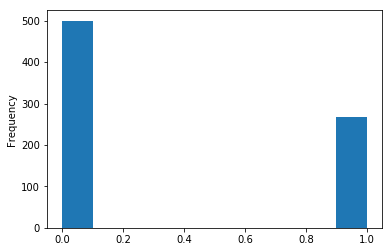

In [229]:
#For Frequeny Distribution
pd.Series(data['class'], name="x variable").plot(kind = 'hist')

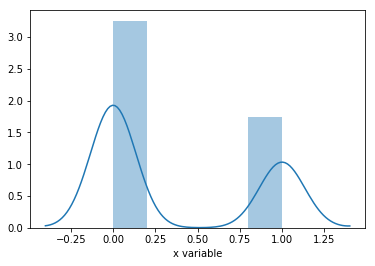

In [230]:
#Distplot will draw a histogram and fit a kernel density estimate (KDE).
class_series = pd.Series(data['class'], name="x variable")
sns.distplot(class_series)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

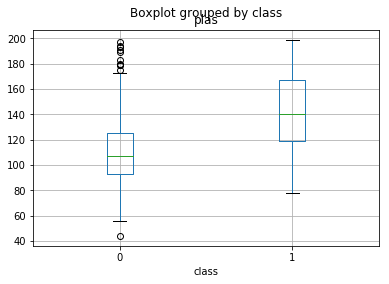

In [231]:
data.boxplot(column = 'plas', by = 'class')

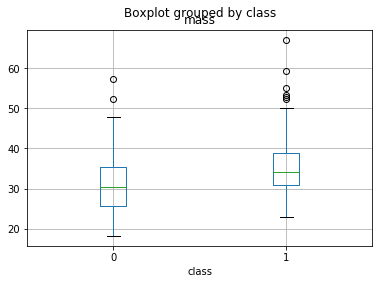

In [232]:
data.boxplot(column = 'mass', by = 'class')

We observe from the attributes compared to 'class' above, namely plasma glucose levels and BMI, which have a relatively high correlation with a positive test for diabetes, that the boxplot seems to be a good approach for univariate analysis for a target variable with binary values i.e. 0 or 1. However, if the target variable is continuous, the boxplot may not be the best approach for univariate analysis.

Now, for observations based on above boxplots, we find that the relative values (median, quantiles and min/max values) of positive detection of diabetes (class = 1) is higher than that of class = 0, or a negative test, for both attributes - plasma and BMI.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


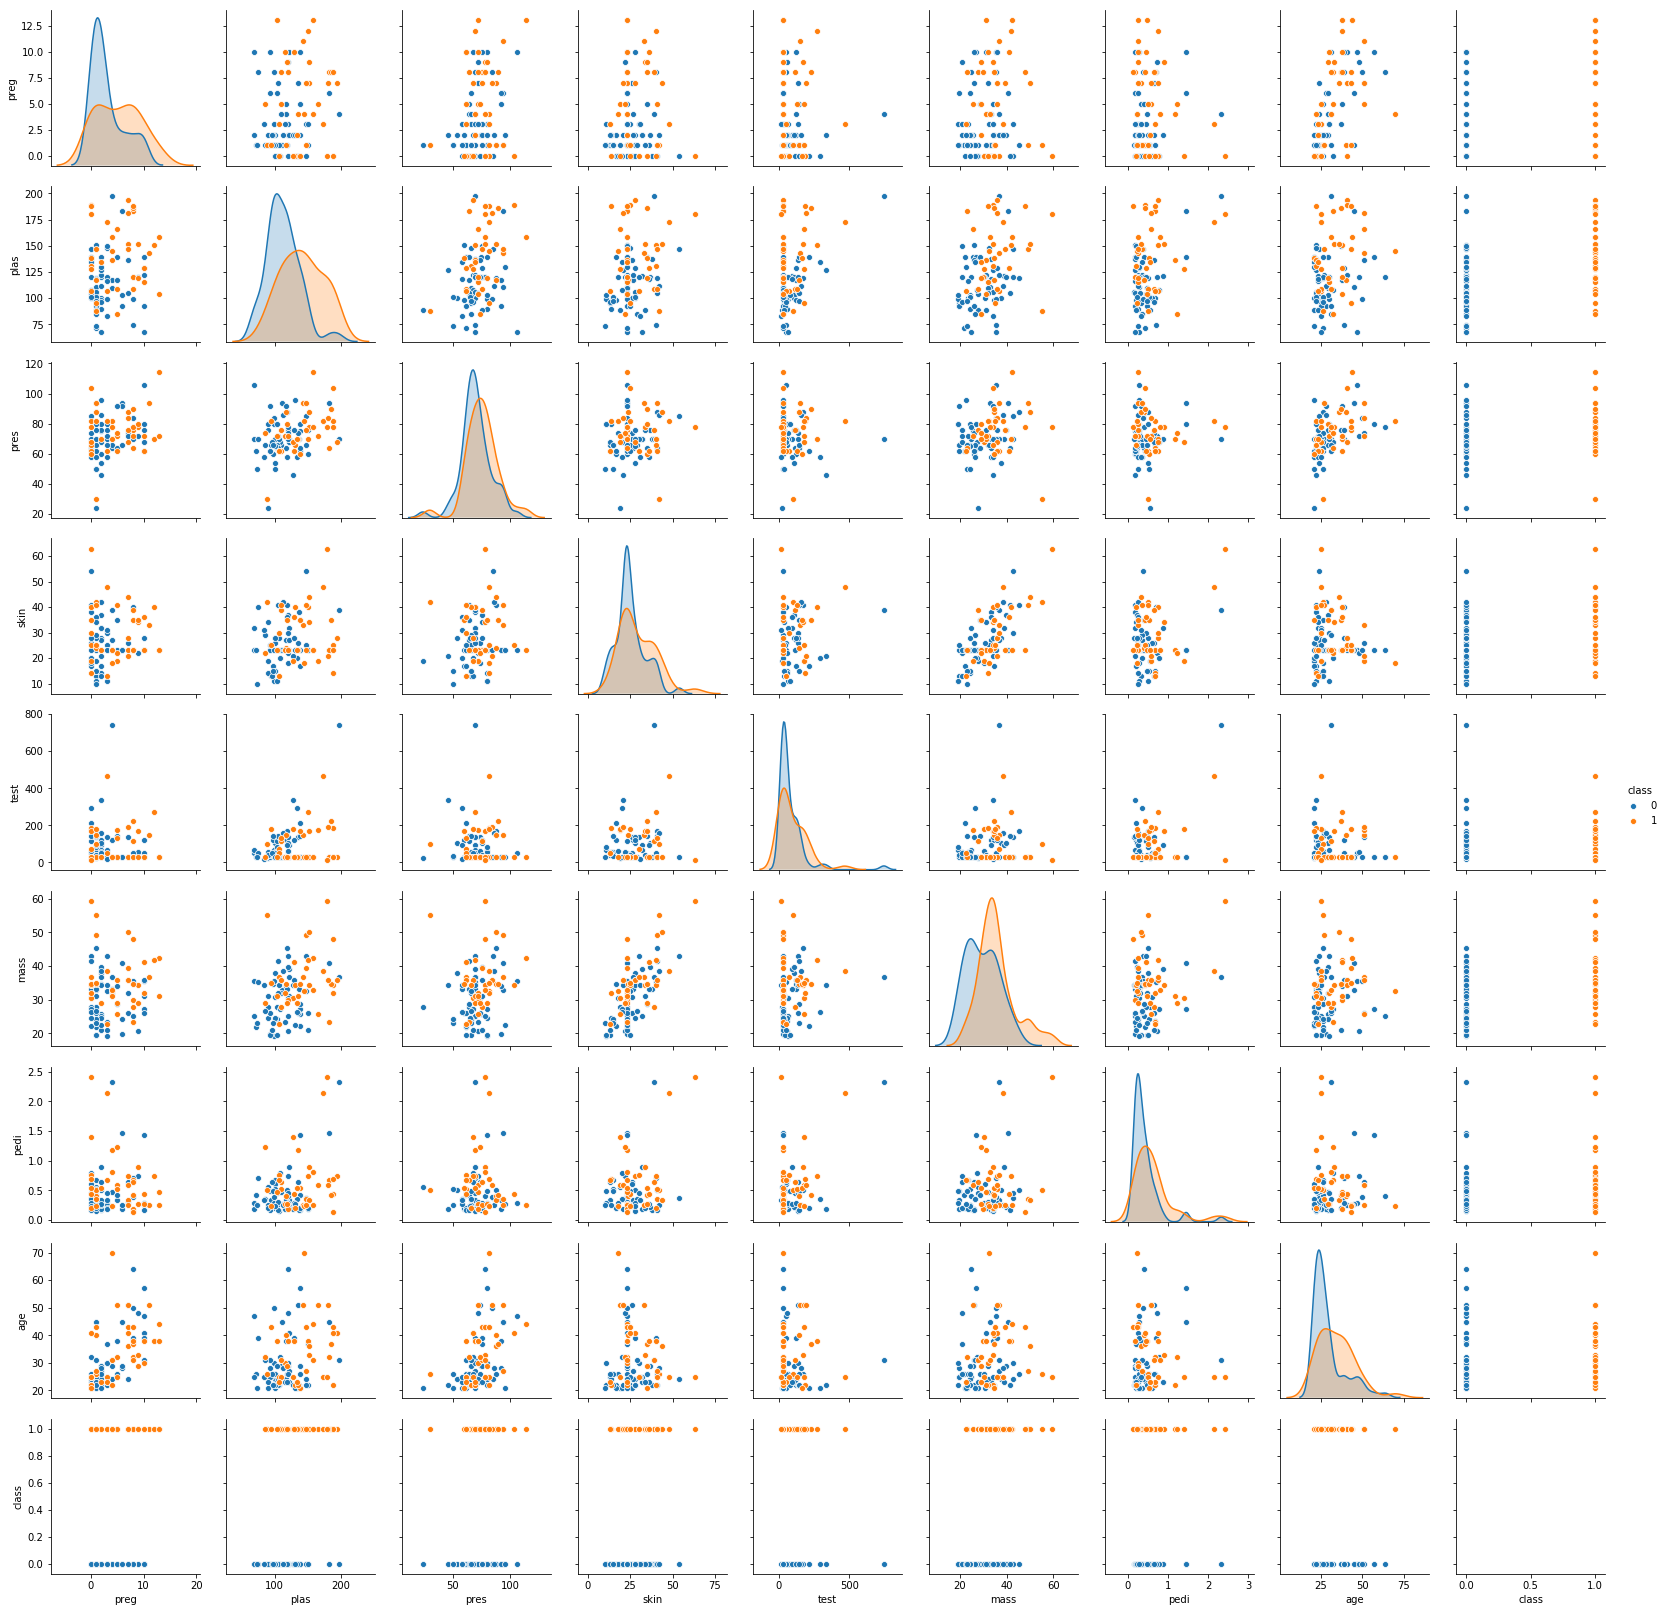

In [233]:
#Taking a random sample of 100 from the dataset for better readability of the graph
sns.pairplot(data.sample(100), hue = 'class')

In [234]:
data.corr()

preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.128213  0.208615  0.032568 -0.056022  0.021546 -0.033523   
plas   0.128213  1.000000  0.218937  0.172143  0.357146  0.231400  0.137327   
pres   0.208615  0.218937  1.000000  0.147809 -0.029029  0.281132 -0.002378   
skin   0.032568  0.172143  0.147809  1.000000  0.238321  0.546951  0.142977   
test  -0.056022  0.357146 -0.029029  0.238321  1.000000  0.188976  0.178173   
mass   0.021546  0.231400  0.281132  0.546951  0.188976  1.000000  0.153506   
pedi  -0.033523  0.137327 -0.002378  0.142977  0.178173  0.153506  1.000000   
age    0.544341  0.266909  0.324915  0.054514 -0.015892  0.025744  0.033561   
class  0.221898  0.492782  0.165723  0.189065  0.148152  0.312249  0.173844   

            age     class  
preg   0.544341  0.221898  
plas   0.266909  0.492782  
pres   0.324915  0.165723  
skin   0.054514  0.189065  
test  -0.015892  0.148152  
mass   0.025744  0.312249  
pedi   0.033561  0.173844  
age    1.000000  0.238356  
class  0.238356  1.000000

From the above plot and correlation table, we infer the following:

1. Positive test for diabetes (class) is relatively highly correlated with the patient's plasma glucose level
2. Age and Number of pregnancy tests are relatively highly correlated
3. Triceps skin fold thickness and BMI are relatively highly correlated

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [235]:
X = data.loc[:, data.columns != 'class']
Y = data[['class']]

In [236]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [237]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [238]:
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test , y_test))

1.0
0.7142857142857143


Print the feature importance of the decision model - Optional

In [239]:
y_predict = dt_model.predict(X_test)

In [240]:
print(metrics.confusion_matrix(y_test, y_predict))

[[115  32]
 [ 34  50]]


In [241]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc, roc_curve

In [242]:
y_predictProb = dt_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])

In [243]:
roc_auc = auc(fpr, tpr)
roc_auc

0.6887755102040817

In [244]:
THRESHOLD = 0.5
preds = np.where(dt_model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [245]:
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

0
accuracy   0.714286
recall     0.595238
precision  0.609756

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [246]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500)
rfcl = rfcl.fit(X_train, y_train)

In [247]:
y_predict = rfcl.predict(X_train)
print(rfcl.score(X_test , y_test))

0.7662337662337663


In [248]:
THRESHOLD = 0.5
preds = np.where(rfcl.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

0
accuracy   0.766234
recall     0.678571
precision  0.678571

# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [249]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
abcl = abcl.fit(X_train, y_train)

In [250]:
THRESHOLD = 0.5
preds = np.where(abcl.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

0
accuracy   0.718615
recall     0.595238
precision  0.617284

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [251]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=500)
bgcl = bgcl.fit(X_train, y_train)

In [252]:
THRESHOLD = 0.5
preds = np.where(bgcl.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

0
accuracy   0.770563
recall     0.738095
precision  0.666667

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [253]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

In [254]:
THRESHOLD = 0.5
preds = np.where(gbcl.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

0
accuracy   0.783550
recall     0.702381
precision  0.702381

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [255]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf1 = VotingClassifier(estimators=[('lr', dt_model), ('rf', abcl), ('gbcl', gbcl), ('bgcl', bgcl), ('rfcl', rfcl)]
                          , voting='soft')

In [256]:
eclf1 = eclf1.fit(X_train, y_train)

In [257]:
THRESHOLD = 0.5
preds = np.where(eclf1.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

0
accuracy   0.718615
recall     0.607143
precision  0.614458

Based on the results of the voting classifier, I believe that the Gradient Boosting Classifier/Bagging Classifier provided better accuracy, recall and precision than the consolidated computation from the voting classifier. However, this may not apply in all cases, and my conclusion is based on this dataset.